In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [4]:
filepath='C://Users//cheth//OneDrive//Desktop//Alabs Docs//Machine learning//case_study'

CreditConsumptionData=pd.read_excel(filepath+'//CreditConsumptionData.xlsx')
CustomerBehaviorData=pd.read_excel(filepath+'//CustomerBehaviorData.xlsx')
CustomerDemographics=pd.read_excel(filepath+'//CustomerDemographics.xlsx')

In [5]:
CustomerDemographics

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0
...,...,...,...,...,...,...,...,...,...,...
19995,1270,current,F,66,MEDIUM,32.2,6,354.0,1,7.0
19996,15992,current,M,53,MEDIUM,19.8,5,809.0,0,14.0
19997,7081,current,F,66,MEDIUM,18.4,1,466.0,0,10.0
19998,6821,current,M,32,LOW,6.0,8,619.0,0,17.0


In [6]:
df=pd.merge(left=CustomerDemographics,right=CustomerBehaviorData,how='inner',on='ID')
df=pd.merge(left=df, right=CreditConsumptionData,on='ID',how='inner')

In [7]:
df.head()

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0,...,14,20770.0,44884.90,369000.75,40,96,46088.0,Y,2646.72,NaN
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0,...,63,78627.0,91073.84,243182.32,7,12,17953.0,Y,5469.79,NaN
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0,...,82,1260.0,96552.00,35467.00,16,42,41121.0,Y,7207.85,NaN
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0,...,78,23332.0,18250.00,87204.35,2,10,32003.0,Y,591.34,NaN
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0,...,171,41672.0,83525.75,83992.00,21,12,9626.0,Y,2621.39,NaN


In [8]:
df.shape

(20000, 49)

In [9]:
df.isna().sum()

ID                                 0
account_type                       1
gender                             1
age                                0
Income                             1
Emp_Tenure_Years                   0
Tenure_with_Bank                   0
region_code                        1
NetBanking_Flag                    0
Avg_days_between_transaction       3
cc_cons_apr                        0
dc_cons_apr                        0
cc_cons_may                        1
dc_cons_may                        0
cc_cons_jun                        0
dc_cons_jun                        1
cc_count_apr                       1
cc_count_may                       0
cc_count_jun                       0
dc_count_apr                       0
dc_count_may                       0
dc_count_jun                       0
card_lim                           0
personal_loan_active               0
vehicle_loan_active                0
personal_loan_closed               1
vehicle_loan_closed                0
i

In [10]:
df_1=df[df.cc_cons.notna()]

In [11]:
df_1

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
111,12554,current,M,35,MEDIUM,15.0,1,708.0,0,17.0,...,40,24563.0,30051.32,12761.00,2,65,50836.00,Y,1674.09,20014.0
112,17645,current,M,35,HIGH,15.0,6,123.0,0,14.0,...,78,23948.0,42119.05,76206.00,21,63,23226.00,Y,13043.34,10173.0
113,7604,current,M,55,MEDIUM,24.5,1,802.0,1,3.0,...,82,10752.0,58373.25,75283.00,7,1,27036.00,Y,25375.27,16095.0
114,1590,current,F,29,MEDIUM,4.5,6,867.0,1,4.0,...,38,12607.0,69851.51,68708.00,21,83,43037.00,Y,3544.33,7707.0
115,16556,current,M,34,MEDIUM,12.6,4,802.0,1,7.0,...,50,25213.0,10071.00,80140.00,8,32,32044.00,NaN,12780.44,96408.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15106,6995,current,F,53,LOW,13.2,9,653.0,1,20.0,...,8,6936.0,487751.19,42625.50,14,8,82851.00,Y,78966.76,4263.0
15107,10376,current,M,44,MEDIUM,2.4,9,535.0,1,2.0,...,20,202639.0,8666.01,34987.55,11,18,118110.47,Y,4762.10,11019.0
15108,2181,current,M,37,MEDIUM,3.4,9,464.0,1,8.0,...,5,44421.0,97896.48,261432.00,4,73,49545.00,Y,2877.33,404227.0
15109,18417,current,M,220,MEDIUM,40.0,10,536.0,1,3.0,...,25,22409.0,22693.92,33025.29,3,80,16130.00,Y,13006.84,28813.0


In [12]:
df_predict=df[df.cc_cons.isna()]

In [13]:
df_predict

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0,...,14,20770.0,44884.90,369000.75,40,96,46088.0,Y,2646.72,NaN
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0,...,63,78627.0,91073.84,243182.32,7,12,17953.0,Y,5469.79,NaN
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0,...,82,1260.0,96552.00,35467.00,16,42,41121.0,Y,7207.85,NaN
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0,...,78,23332.0,18250.00,87204.35,2,10,32003.0,Y,591.34,NaN
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0,...,171,41672.0,83525.75,83992.00,21,12,9626.0,Y,2621.39,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1270,current,F,66,MEDIUM,32.2,6,354.0,1,7.0,...,8,24438.0,153772.21,31284.00,3,38,42872.0,Y,6334.20,NaN
19996,15992,current,M,53,MEDIUM,19.8,5,809.0,0,14.0,...,11,213000.0,18098.47,93108.00,43,11,36747.0,Y,102216.02,NaN
19997,7081,current,F,66,MEDIUM,18.4,1,466.0,0,10.0,...,171,34327.0,32198.63,46800.00,3,38,18810.0,Y,1930.19,NaN
19998,6821,current,M,32,LOW,6.0,8,619.0,0,17.0,...,82,51929.0,27334.14,20201.00,47,80,11443.0,Y,24499.91,NaN


In [14]:
df_1.isna().sum()

ID                              0
account_type                    0
gender                          0
age                             0
Income                          0
Emp_Tenure_Years                0
Tenure_with_Bank                0
region_code                     0
NetBanking_Flag                 0
Avg_days_between_transaction    1
cc_cons_apr                     0
dc_cons_apr                     0
cc_cons_may                     0
dc_cons_may                     0
cc_cons_jun                     0
dc_cons_jun                     0
cc_count_apr                    1
cc_count_may                    0
cc_count_jun                    0
dc_count_apr                    0
dc_count_may                    0
dc_count_jun                    0
card_lim                        0
personal_loan_active            0
vehicle_loan_active             0
personal_loan_closed            1
vehicle_loan_closed             0
investment_1                    0
investment_2                    0
investment_3  

In [15]:
df_1.dropna(inplace=True)

In [16]:
df_1.isna().sum()

ID                              0
account_type                    0
gender                          0
age                             0
Income                          0
Emp_Tenure_Years                0
Tenure_with_Bank                0
region_code                     0
NetBanking_Flag                 0
Avg_days_between_transaction    0
cc_cons_apr                     0
dc_cons_apr                     0
cc_cons_may                     0
dc_cons_may                     0
cc_cons_jun                     0
dc_cons_jun                     0
cc_count_apr                    0
cc_count_may                    0
cc_count_jun                    0
dc_count_apr                    0
dc_count_may                    0
dc_count_jun                    0
card_lim                        0
personal_loan_active            0
vehicle_loan_active             0
personal_loan_closed            0
vehicle_loan_closed             0
investment_1                    0
investment_2                    0
investment_3  

In [17]:
df_1.shape

(14995, 49)

In [18]:
df_1.columns

Index(['ID', 'account_type', 'gender', 'age', 'Income', 'Emp_Tenure_Years',
       'Tenure_with_Bank', 'region_code', 'NetBanking_Flag',
       'Avg_days_between_transaction', 'cc_cons_apr', 'dc_cons_apr',
       'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun',
       'cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr',
       'dc_count_may', 'dc_count_jun', 'card_lim', 'personal_loan_active',
       'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed',
       'investment_1', 'investment_2', 'investment_3', 'investment_4',
       'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr',
       'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may',
       'credit_amount_may', 'credit_count_may', 'debit_count_may',
       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun',
       'loan_enq', 'emi_active', 'cc_cons'],
      dtype='object')

In [19]:
df_1=df_1.drop (columns=['personal_loan_closed','vehicle_loan_closed','personal_loan_active','vehicle_loan_active'])

In [20]:
df_1

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
111,12554,current,M,35,MEDIUM,15.0,1,708.0,0,17.0,...,40,24563.0,30051.32,12761.00,2,65,50836.00,Y,1674.09,20014.0
112,17645,current,M,35,HIGH,15.0,6,123.0,0,14.0,...,78,23948.0,42119.05,76206.00,21,63,23226.00,Y,13043.34,10173.0
113,7604,current,M,55,MEDIUM,24.5,1,802.0,1,3.0,...,82,10752.0,58373.25,75283.00,7,1,27036.00,Y,25375.27,16095.0
114,1590,current,F,29,MEDIUM,4.5,6,867.0,1,4.0,...,38,12607.0,69851.51,68708.00,21,83,43037.00,Y,3544.33,7707.0
116,19106,current,M,27,MEDIUM,4.9,3,958.0,1,11.0,...,2,21440.0,52292.68,199925.50,2,35,17284.00,Y,5026.50,130263.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15106,6995,current,F,53,LOW,13.2,9,653.0,1,20.0,...,8,6936.0,487751.19,42625.50,14,8,82851.00,Y,78966.76,4263.0
15107,10376,current,M,44,MEDIUM,2.4,9,535.0,1,2.0,...,20,202639.0,8666.01,34987.55,11,18,118110.47,Y,4762.10,11019.0
15108,2181,current,M,37,MEDIUM,3.4,9,464.0,1,8.0,...,5,44421.0,97896.48,261432.00,4,73,49545.00,Y,2877.33,404227.0
15109,18417,current,M,220,MEDIUM,40.0,10,536.0,1,3.0,...,25,22409.0,22693.92,33025.29,3,80,16130.00,Y,13006.84,28813.0


In [21]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [22]:
df_1[['account_type','gender','Income']]=df_1[['account_type','gender','Income']].apply(labelencoder.fit_transform)

In [23]:
df_1.dtypes

ID                                int64
account_type                      int32
gender                            int32
age                               int64
Income                            int32
Emp_Tenure_Years                float64
Tenure_with_Bank                  int64
region_code                     float64
NetBanking_Flag                   int64
Avg_days_between_transaction    float64
cc_cons_apr                     float64
dc_cons_apr                     float64
cc_cons_may                     float64
dc_cons_may                     float64
cc_cons_jun                     float64
dc_cons_jun                     float64
cc_count_apr                    float64
cc_count_may                      int64
cc_count_jun                      int64
dc_count_apr                      int64
dc_count_may                      int64
dc_count_jun                      int64
card_lim                          int64
investment_1                    float64
investment_2                    float64


In [24]:
df_1

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
111,12554,0,1,35,2,15.0,1,708.0,0,17.0,...,40,24563.0,30051.32,12761.00,2,65,50836.00,Y,1674.09,20014.0
112,17645,0,1,35,0,15.0,6,123.0,0,14.0,...,78,23948.0,42119.05,76206.00,21,63,23226.00,Y,13043.34,10173.0
113,7604,0,1,55,2,24.5,1,802.0,1,3.0,...,82,10752.0,58373.25,75283.00,7,1,27036.00,Y,25375.27,16095.0
114,1590,0,0,29,2,4.5,6,867.0,1,4.0,...,38,12607.0,69851.51,68708.00,21,83,43037.00,Y,3544.33,7707.0
116,19106,0,1,27,2,4.9,3,958.0,1,11.0,...,2,21440.0,52292.68,199925.50,2,35,17284.00,Y,5026.50,130263.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15106,6995,0,0,53,1,13.2,9,653.0,1,20.0,...,8,6936.0,487751.19,42625.50,14,8,82851.00,Y,78966.76,4263.0
15107,10376,0,1,44,2,2.4,9,535.0,1,2.0,...,20,202639.0,8666.01,34987.55,11,18,118110.47,Y,4762.10,11019.0
15108,2181,0,1,37,2,3.4,9,464.0,1,8.0,...,5,44421.0,97896.48,261432.00,4,73,49545.00,Y,2877.33,404227.0
15109,18417,0,1,220,2,40.0,10,536.0,1,3.0,...,25,22409.0,22693.92,33025.29,3,80,16130.00,Y,13006.84,28813.0


In [25]:
df_1.select_dtypes('number')

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
111,12554,0,1,35,2,15.0,1,708.0,0,17.0,...,2,40,24563.0,30051.32,12761.00,2,65,50836.00,1674.09,20014.0
112,17645,0,1,35,0,15.0,6,123.0,0,14.0,...,2,78,23948.0,42119.05,76206.00,21,63,23226.00,13043.34,10173.0
113,7604,0,1,55,2,24.5,1,802.0,1,3.0,...,2,82,10752.0,58373.25,75283.00,7,1,27036.00,25375.27,16095.0
114,1590,0,0,29,2,4.5,6,867.0,1,4.0,...,23,38,12607.0,69851.51,68708.00,21,83,43037.00,3544.33,7707.0
116,19106,0,1,27,2,4.9,3,958.0,1,11.0,...,43,2,21440.0,52292.68,199925.50,2,35,17284.00,5026.50,130263.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15106,6995,0,0,53,1,13.2,9,653.0,1,20.0,...,1,8,6936.0,487751.19,42625.50,14,8,82851.00,78966.76,4263.0
15107,10376,0,1,44,2,2.4,9,535.0,1,2.0,...,4,20,202639.0,8666.01,34987.55,11,18,118110.47,4762.10,11019.0
15108,2181,0,1,37,2,3.4,9,464.0,1,8.0,...,43,5,44421.0,97896.48,261432.00,4,73,49545.00,2877.33,404227.0
15109,18417,0,1,220,2,40.0,10,536.0,1,3.0,...,3,25,22409.0,22693.92,33025.29,3,80,16130.00,13006.84,28813.0


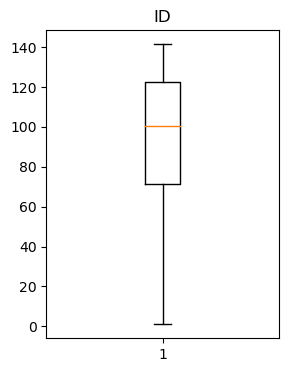

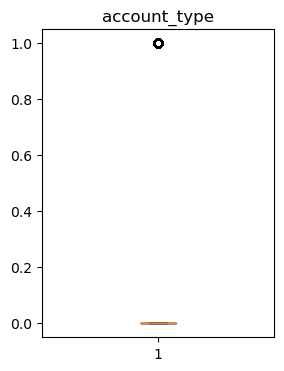

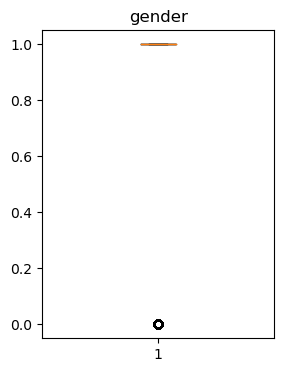

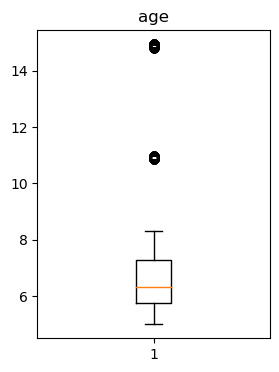

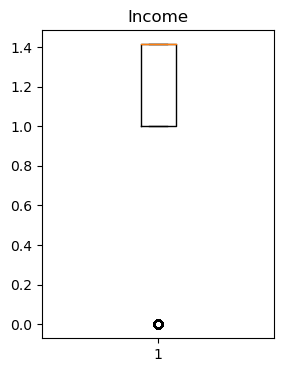

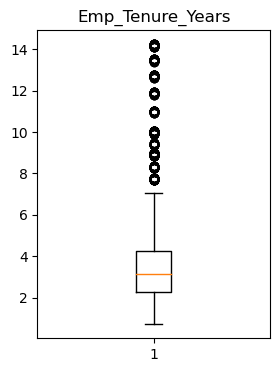

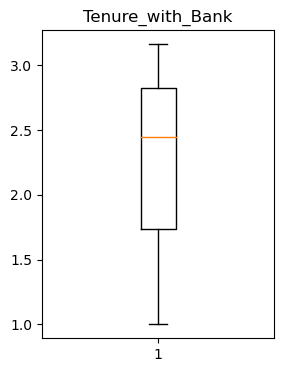

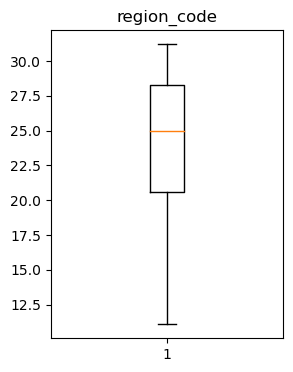

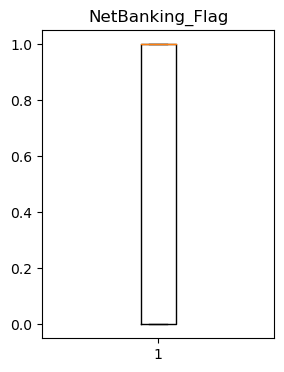

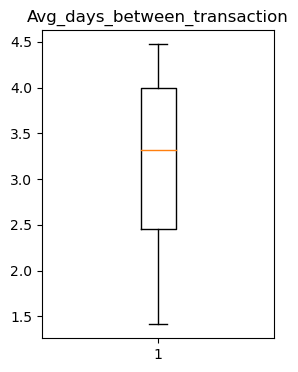

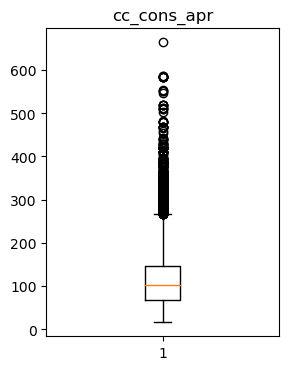

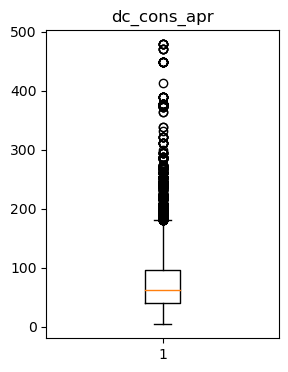

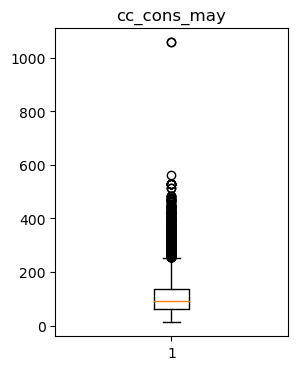

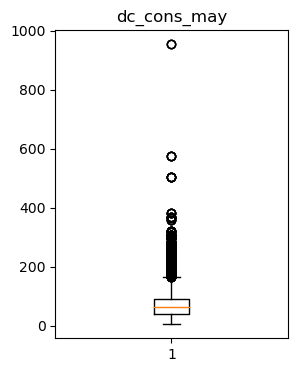

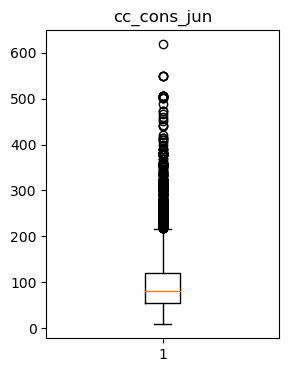

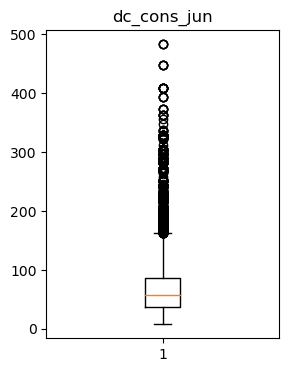

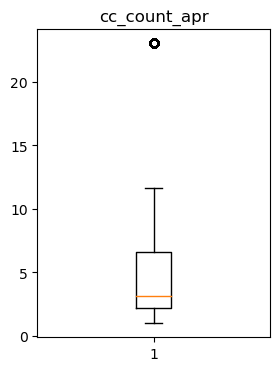

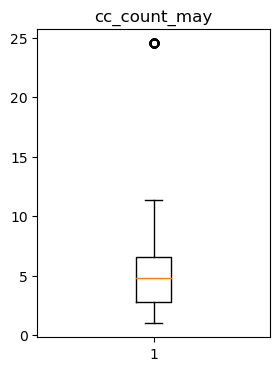

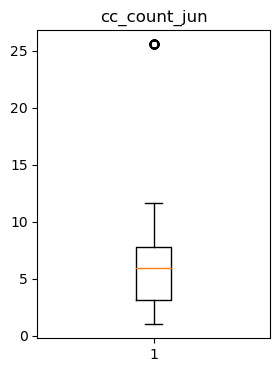

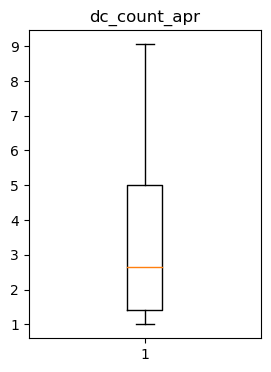

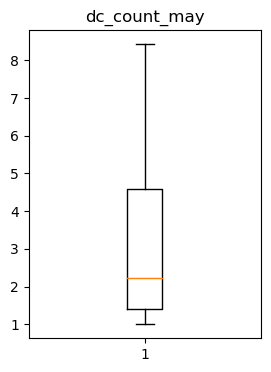

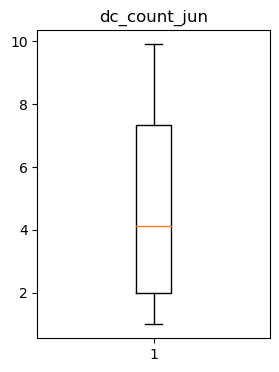

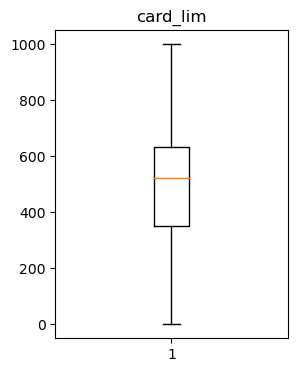

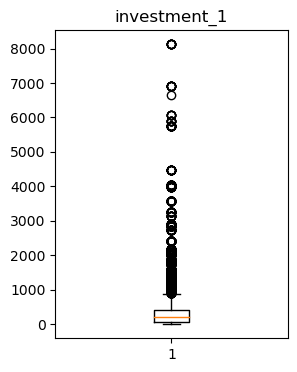

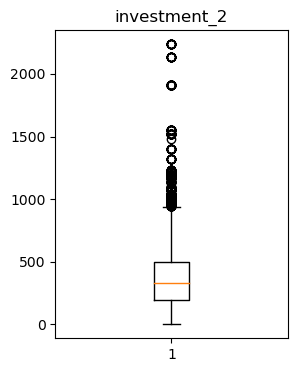

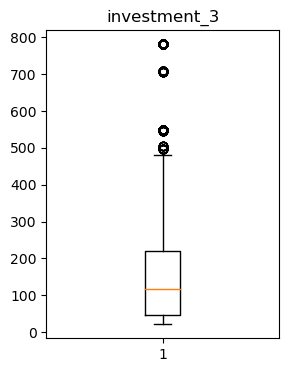

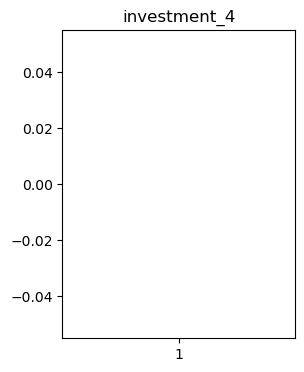

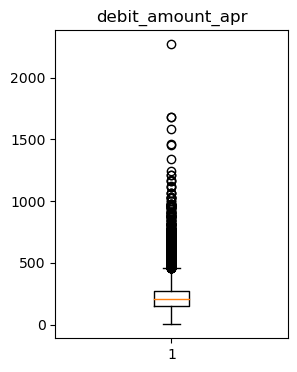

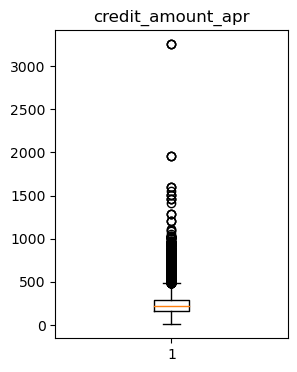

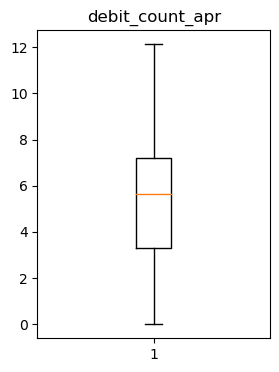

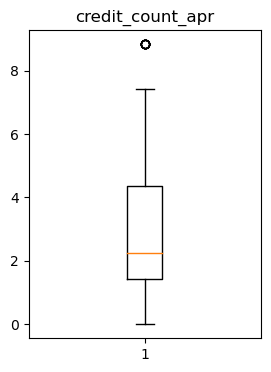

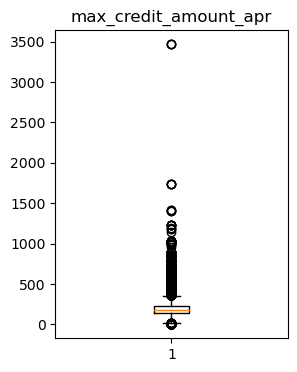

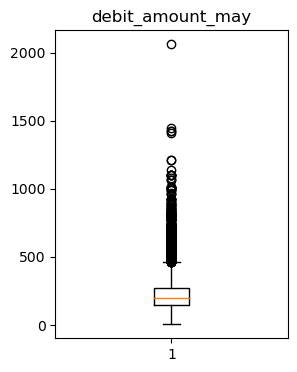

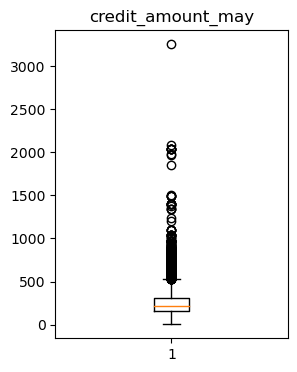

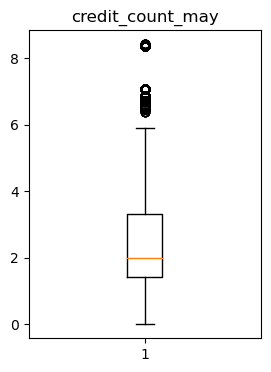

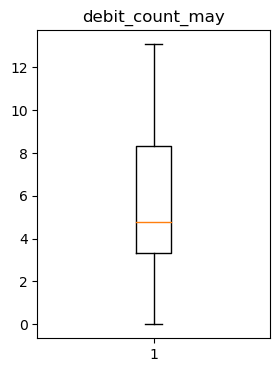

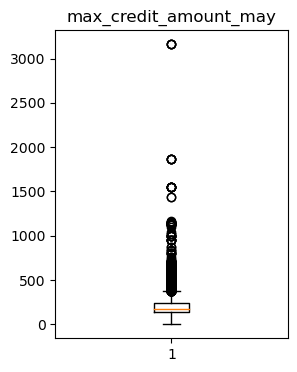

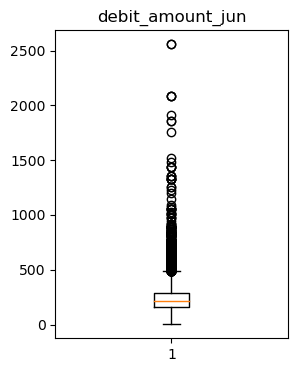

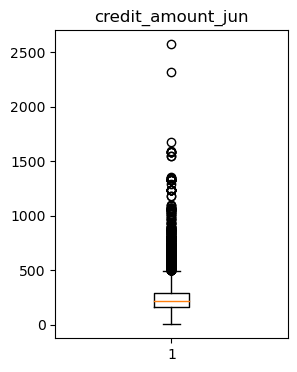

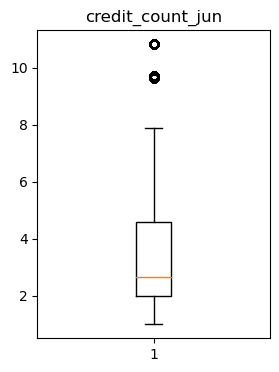

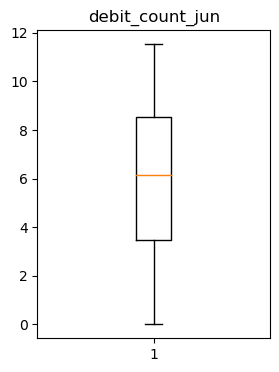

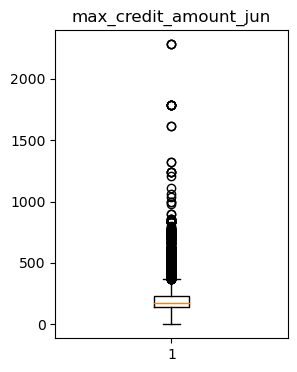

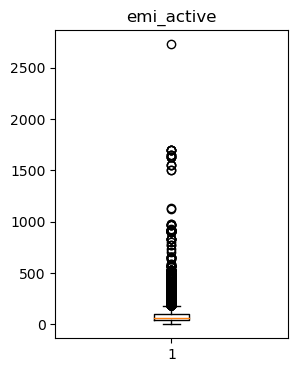

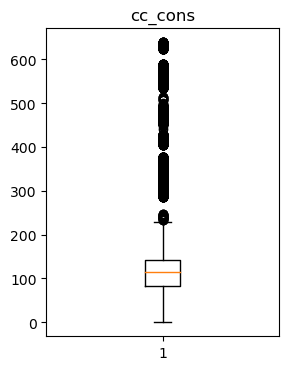

In [26]:
for i in df_1.select_dtypes('number'):
    plt.figure(figsize=(3,4))
    plt.title(i)
    plt.boxplot(np.sqrt(df_1[i]))
    plt.show()

In [27]:
df_1.age.describe(percentiles=[0.9,0.95,0.96,0.97,0.98,0.99])

count    14995.000000
mean        47.793331
std         30.636617
min         25.000000
50%         40.000000
90%         64.000000
95%         66.000000
96%         69.000000
97%        118.000000
98%        220.000000
99%        222.000000
max        223.000000
Name: age, dtype: float64

In [28]:
df_1.describe(percentiles=[0.02,0.25,0.75,0.95,0.96,0.97,0.99]).T

,count,mean,std,min,2%,25%,50%,75%,95%,96%,97%,99%,max
ID,14995.0,10032.128443,5.760866e+03,1.00,420.7600,5058.500,10055.00,15015.500,19003.300,1.919948e+04,1.940918e+04,1.980406e+04,19998.00
account_type,14995.0,0.151584,3.586290e-01,0.00,0.0000,0.000,0.00,0.000,1.000,1.000000e+00,1.000000e+00,1.000000e+00,1.00
gender,14995.0,0.863021,3.438366e-01,0.00,0.0000,1.000,1.00,1.000,1.000,1.000000e+00,1.000000e+00,1.000000e+00,1.00
age,14995.0,47.793331,3.063662e+01,25.00,27.0000,33.000,40.00,53.000,66.000,6.900000e+01,1.180000e+02,2.220000e+02,223.00
Income,14995.0,1.560920,6.373663e-01,0.00,0.0000,1.000,2.00,2.000,2.000,2.000000e+00,2.000000e+00,2.000000e+00,2.00
Emp_Tenure_Years,14995.0,15.185028,2.031568e+01,0.50,1.2000,5.100,9.90,18.000,40.000,4.200000e+01,4.600000e+01,1.212000e+02,203.00
Tenure_with_Bank,14995.0,5.510770,2.865848e+00,1.00,1.0000,3.000,6.00,8.000,10.000,1.000000e+01,1.000000e+01,1.000000e+01,10.00
region_code,14995.0,598.410804,2.200713e+02,123.00,243.0000,424.000,623.00,799.000,937.000,9.550000e+02,9.580000e+02,9.680000e+02,974.00
NetBanking_Flag,14995.0,0.719507,4.492553e-01,0.00,0.0000,0.000,1.00,1.000,1.000,1.000000e+00,1.000000e+00,1.000000e+00,1.00
Avg_days_between_transaction,14995.0,11.048616,5.492216e+00,2.00,2.0000,6.000,11.00,16.000,20.000,2.000000e+01,2.000000e+01,2.000000e+01,20.00


### the age column having the max value is 223, but its impossible to have, so replacing the age to 96th percentile

In [29]:
df1=df_1.select_dtypes(include=['int','float'])

def Outlier(data):
    data=data.clip(lower=data.quantile(.02),upper=data.quantile(.96))
    return data
df_1=df1.apply(Outlier)

In [30]:
# df_1.age.clip(lower=df_1.age.quantile(.02),upper=df_1.age.quantile(.96))

{'whiskers': [<matplotlib.lines.Line2D at 0x27e428c5030>,
 'caps': [<matplotlib.lines.Line2D at 0x27e428c67a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27e428c55d0>],
 'medians': [<matplotlib.lines.Line2D at 0x27e428c7670>],
 'fliers': [<matplotlib.lines.Line2D at 0x27e428c6050>],
 'means': []}

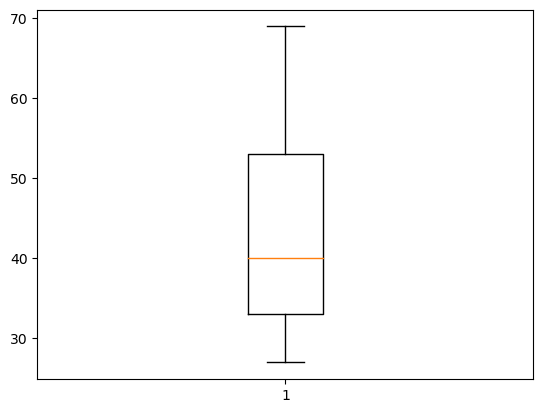

In [31]:
plt.boxplot(df_1.age)

In [32]:
ddf=df_1.select_dtypes(include=['int','float'])

In [33]:
df_2=ddf.apply(Outlier)

{'whiskers': [<matplotlib.lines.Line2D at 0x27e42e32110>,
 'caps': [<matplotlib.lines.Line2D at 0x27e42e30a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x27e42e32fe0>],
 'medians': [<matplotlib.lines.Line2D at 0x27e42e31540>],
 'fliers': [<matplotlib.lines.Line2D at 0x27e42e31b70>],
 'means': []}

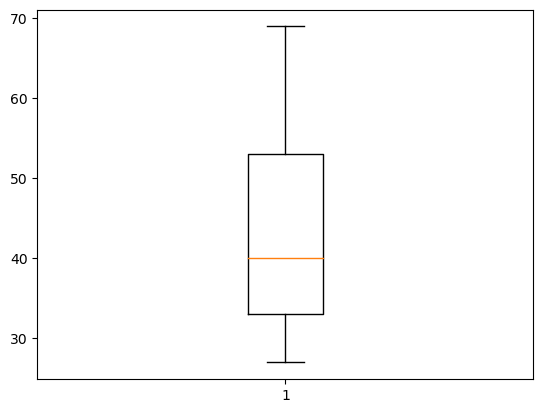

In [34]:
plt.boxplot(ddf.age)

In [35]:
df_2.describe(percentiles=[0.95])

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
count,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,...,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000
mean,10019.998431,0.151584,0.863021,43.621741,1.560920,13.311624,5.510770,598.924842,0.719507,11.048616,...,11.423741,41.026409,46226.708942,65606.787191,67244.385771,19.375058,44.158119,43901.967554,7951.217893,53710.411262
std,5727.207456,0.358629,0.343837,12.913458,0.637366,10.908765,2.865848,217.843765,0.449255,5.492216,...,15.342555,40.518417,42037.524959,58958.845500,63464.117534,25.327689,34.106400,40438.628284,10647.789327,93121.830849
min,420.971200,0.000000,0.000000,27.000000,0.000000,1.200000,1.000000,243.000000,0.000000,2.000000,...,0.000000,2.000000,977.222272,2598.000000,568.000000,1.000000,0.000000,322.884800,77.690000,502.942400
50%,10055.000000,0.000000,1.000000,40.000000,2.000000,9.900000,6.000000,623.000000,1.000000,11.000000,...,4.000000,23.000000,31408.000000,45801.490000,45901.000000,7.000000,38.000000,30425.000000,3953.580000,13363.000000
95%,19003.300000,1.000000,1.000000,66.000000,2.000000,40.000000,10.000000,937.000000,1.000000,20.000000,...,47.000000,108.000000,155516.500000,218851.495000,234786.825000,94.000000,106.000000,152063.600000,36788.750000,309897.000000
max,19199.115200,1.000000,1.000000,69.000000,2.000000,42.000000,10.000000,955.000000,1.000000,20.000000,...,50.000000,171.000000,180358.545600,242579.950000,261435.110400,94.000000,107.000000,173057.865600,45152.870000,322001.633600


In [36]:
df_2.corr()

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
ID,1.000000,0.011122,0.006223,-0.001380,-0.002754,0.000506,0.000984,-0.003744,-0.001732,-0.002250,...,-0.014157,0.005740,-0.001942,-0.000386,-0.000629,-0.003506,-0.011053,0.008831,0.011514,0.005131
account_type,0.011122,1.000000,-0.001432,-0.003560,0.000884,-0.004997,0.012915,-0.009461,-0.005563,0.000592,...,0.016095,0.001556,-0.003082,-0.006450,0.005567,0.005936,-0.002636,-0.004195,0.006792,0.002038
gender,0.006223,-0.001432,1.000000,-0.000134,0.025603,-0.002556,0.015711,0.006663,0.011600,0.000984,...,-0.007341,0.006746,0.010262,-0.010502,-0.000161,-0.005641,-0.006888,0.002530,-0.003952,0.002601
age,-0.001380,-0.003560,-0.000134,1.000000,-0.006308,0.714369,0.000150,0.003848,0.009761,0.004769,...,0.002957,0.018647,0.002352,-0.010506,-0.003799,-0.005203,0.003627,-0.002906,0.009892,-0.005100
Income,-0.002754,0.000884,0.025603,-0.006308,1.000000,-0.012147,0.001384,-0.011806,-0.012757,-0.002418,...,0.008709,-0.004987,-0.002557,0.007604,-0.006161,0.002439,-0.000917,-0.010884,0.004045,-0.002282
Emp_Tenure_Years,0.000506,-0.004997,-0.002556,0.714369,-0.012147,1.000000,-0.005990,-0.000353,0.002588,0.006715,...,-0.004995,0.010926,0.000914,-0.007415,-0.004262,-0.011315,0.007083,0.001727,0.006219,-0.008880
Tenure_with_Bank,0.000984,0.012915,0.015711,0.000150,0.001384,-0.005990,1.000000,-0.003593,-0.005786,0.009520,...,0.000448,0.004495,0.001895,-0.006249,0.007363,-0.010585,-0.000195,-0.000625,-0.020221,0.011161
region_code,-0.003744,-0.009461,0.006663,0.003848,-0.011806,-0.000353,-0.003593,1.000000,0.006859,-0.016961,...,-0.008221,0.002095,-0.018583,0.010753,-0.004582,0.003637,0.010617,0.009371,0.012186,-0.018717
NetBanking_Flag,-0.001732,-0.005563,0.011600,0.009761,-0.012757,0.002588,-0.005786,0.006859,1.000000,0.009068,...,0.008808,-0.013538,-0.001260,-0.009956,0.003709,0.011643,-0.000683,0.006143,-0.008684,0.002260
Avg_days_between_transaction,-0.002250,0.000592,0.000984,0.004769,-0.002418,0.006715,0.009520,-0.016961,0.009068,1.000000,...,0.004227,0.000036,-0.003279,0.000084,0.007406,-0.004092,0.000509,-0.003835,0.003966,-0.004704


<Axes: >

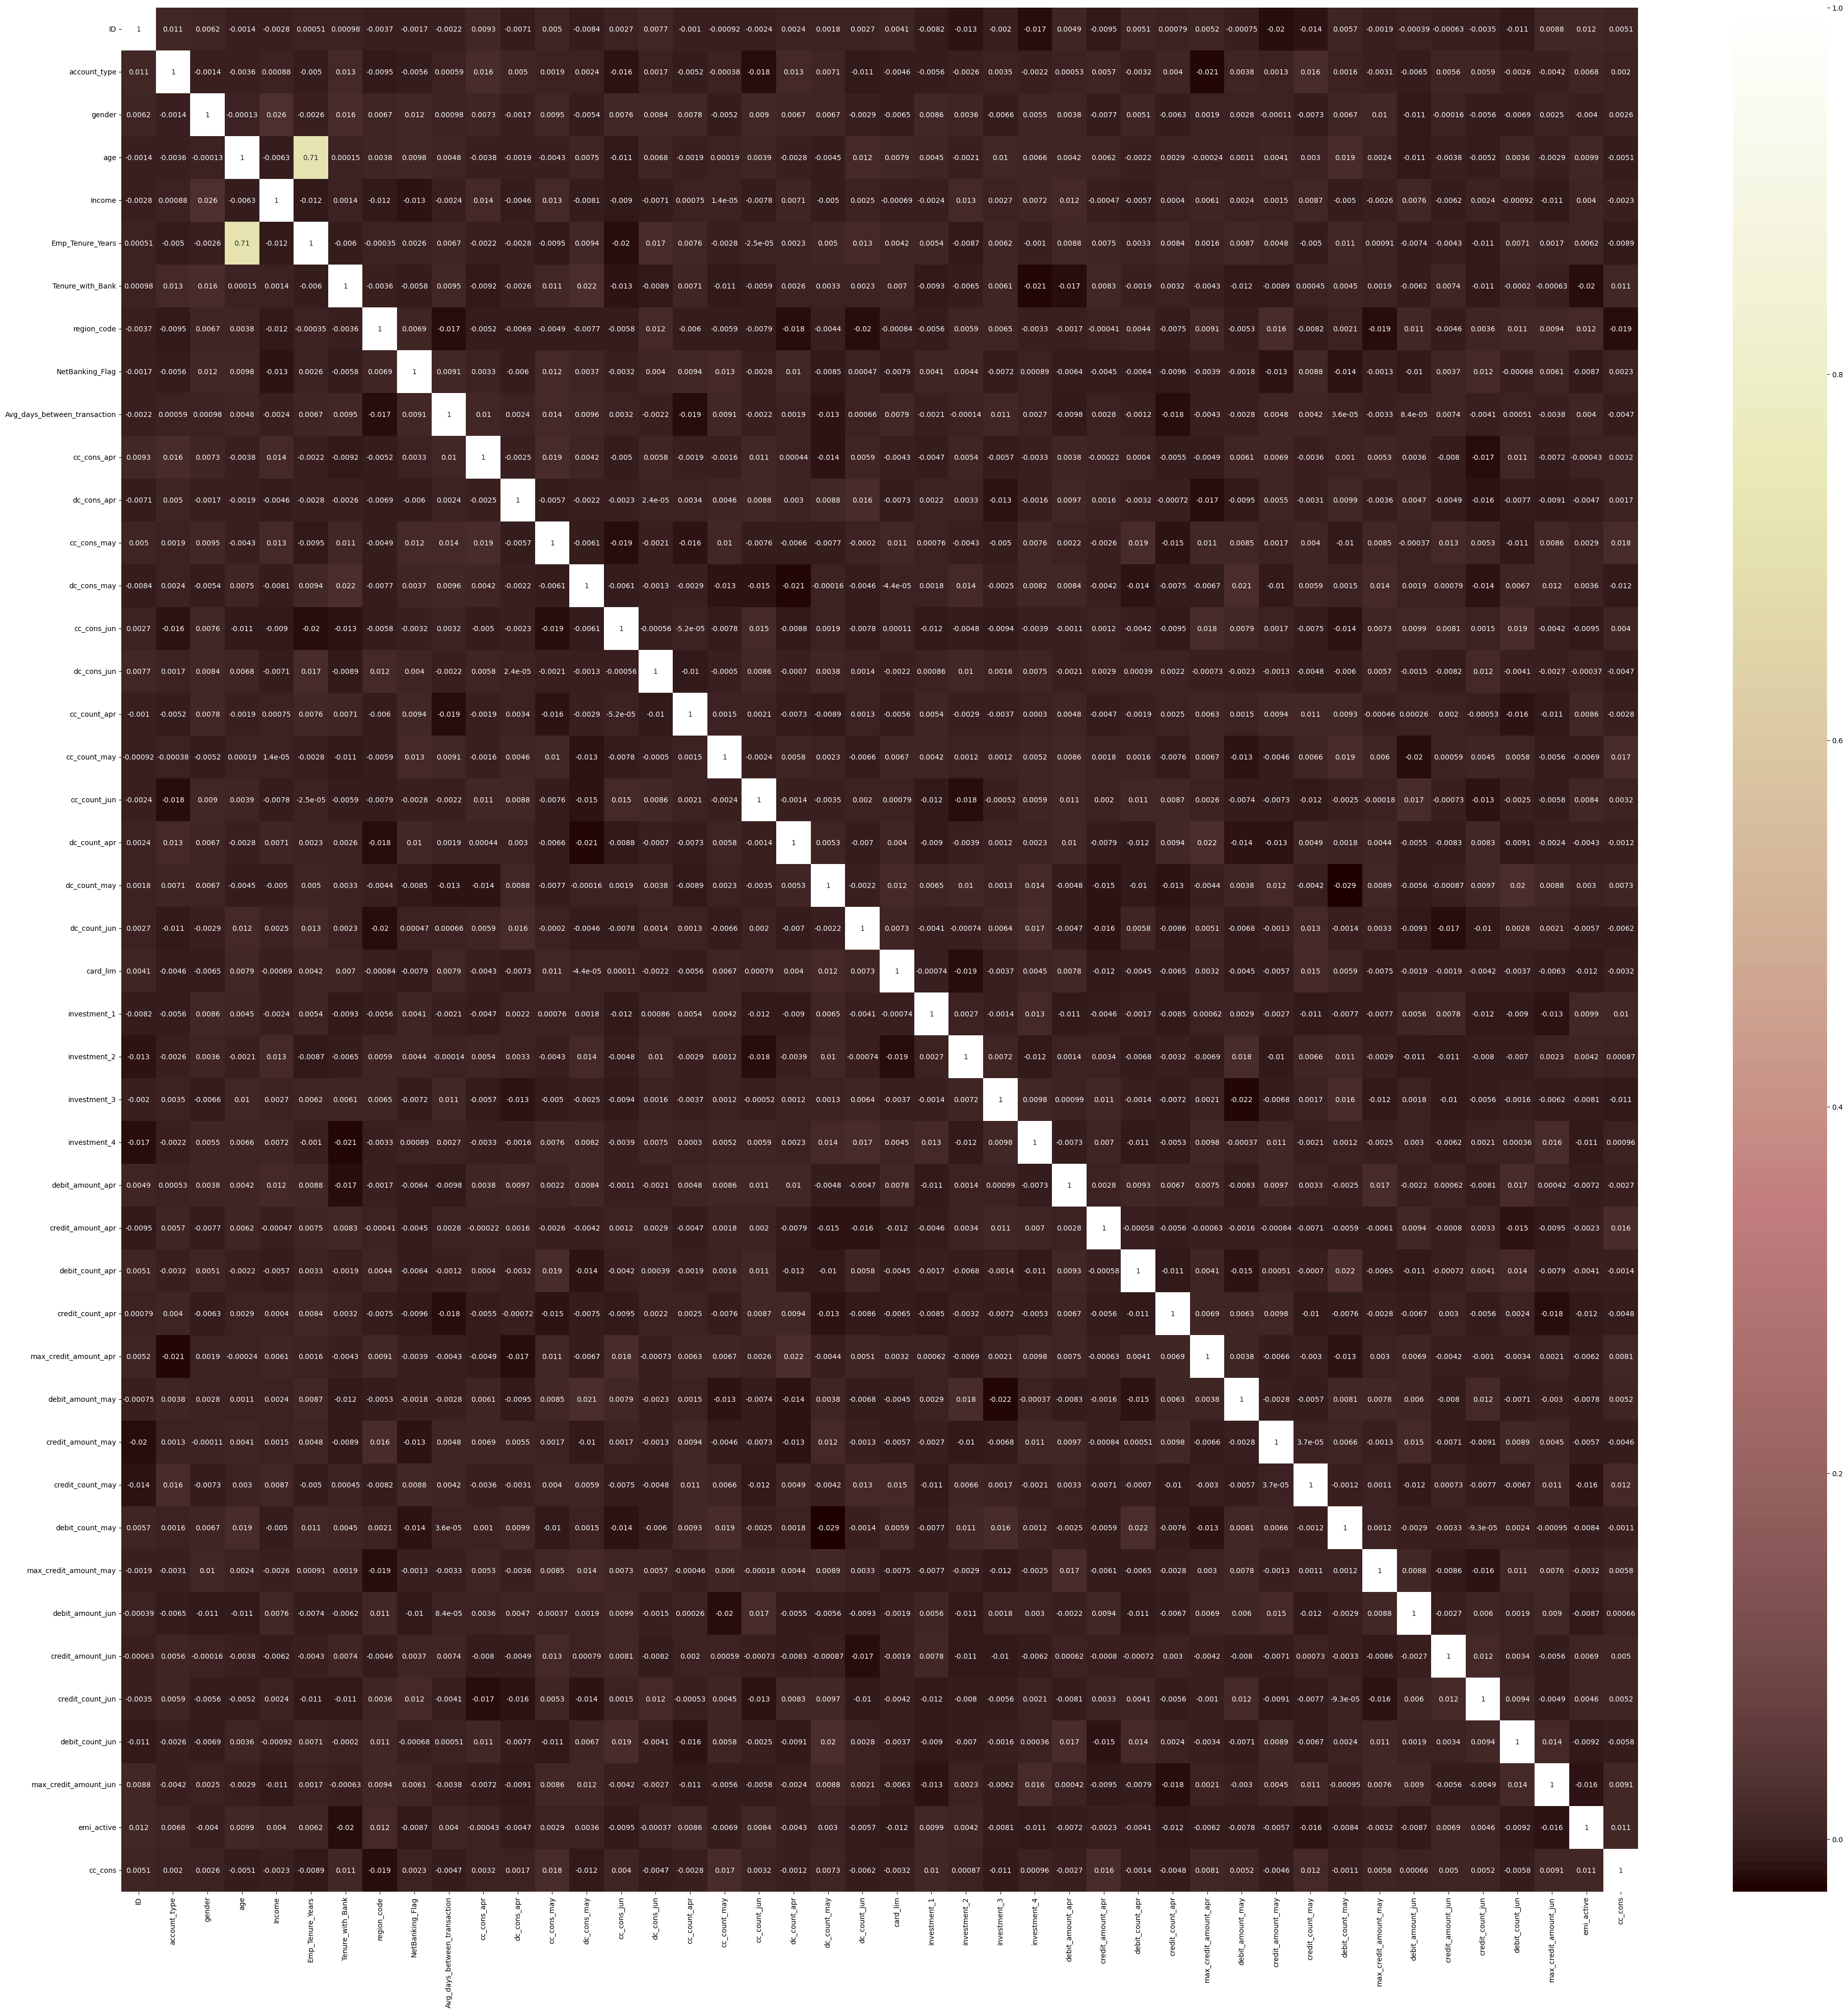

In [37]:
plt.figure(figsize=(48,48))
sns.heatmap(df_2.corr(), annot=True,cmap='pink')

<Axes: xlabel='cc_cons', ylabel='Density'>

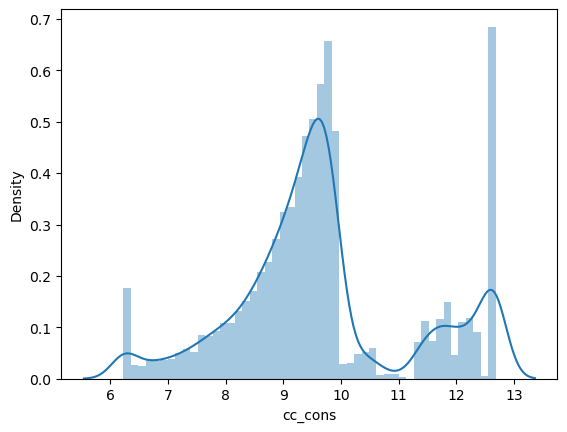

In [38]:
sns.distplot(np.log(df_2.cc_cons))

In [39]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [40]:
df_2.columns

Index(['ID', 'account_type', 'gender', 'age', 'Income', 'Emp_Tenure_Years',
       'Tenure_with_Bank', 'region_code', 'NetBanking_Flag',
       'Avg_days_between_transaction', 'cc_cons_apr', 'dc_cons_apr',
       'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun',
       'cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr',
       'dc_count_may', 'dc_count_jun', 'card_lim', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
       'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may',
       'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun',
       'debit_count_jun', 'max_credit_amount_jun', 'emi_active', 'cc_cons'],
      dtype='object')

In [41]:
col=['age', 'Emp_Tenure_Years',
       'Tenure_with_Bank', 'region_code', 'NetBanking_Flag',
       'Avg_days_between_transaction', 'cc_cons_apr', 'dc_cons_apr',
       'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun',
       'cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr',
       'dc_count_may', 'dc_count_jun', 'card_lim', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
       'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may',
       'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun',
       'debit_count_jun', 'max_credit_amount_jun', 'emi_active']

In [42]:
df_2[col]=standardscaler.fit_transform(df_2[col])

In [43]:
df_2

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
111,12554.0,0,1,-0.667678,2,0.154778,-1.574026,0.500720,-1.601607,1.083640,...,-0.614243,-0.025333,-0.515359,-0.603076,-0.858520,-0.686033,0.611105,0.171476,-0.589544,20014.0000
112,17645.0,0,1,-0.667678,0,0.154778,0.170716,-1.633908,-1.601607,0.537394,...,-0.614243,0.912544,-0.529990,-0.398388,0.141212,0.064159,0.552463,-0.511310,0.478249,10173.0000
113,7604.0,0,1,0.881146,2,1.025666,-1.574026,0.932237,0.624373,-1.465508,...,-0.614243,1.011267,-0.843910,-0.122692,0.126668,-0.488614,-1.265439,-0.417090,1.636455,16095.0000
114,1590.0,0,0,-1.132325,2,-0.807783,0.170716,1.230626,0.624373,-1.283426,...,0.754545,-0.074695,-0.799781,0.071997,0.023063,0.064159,1.138882,-0.021390,-0.413892,7707.0000
116,19106.0,0,1,-1.287207,2,-0.771114,-0.876129,1.634598,0.624373,-0.008852,...,2.058152,-0.963209,-0.589653,-0.225828,2.090717,-0.686033,-0.268525,-0.658253,-0.274688,130263.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15106,6995.0,0,0,0.726263,1,-0.010233,1.217561,0.248237,0.624373,1.629885,...,-0.679423,-0.815123,-0.934689,3.001739,-0.387931,-0.212228,-1.060192,0.963196,3.493955,4263.0000
15107,10376.0,0,1,0.029293,2,-1.000295,1.217561,-0.293453,0.624373,-1.647590,...,-0.483882,-0.518952,3.190871,-0.965804,-0.508286,-0.330679,-0.766982,1.835151,-0.299520,11019.0000
15108,2181.0,0,1,-0.512795,2,-0.908623,1.217561,-0.619386,0.624373,-0.555098,...,2.058152,-0.889166,-0.042956,0.547683,3.059904,-0.607066,0.845672,0.139550,-0.476536,322001.6336
15109,18417.0,0,1,1.965322,2,2.446589,1.566510,-0.288863,0.624373,-1.465508,...,-0.549063,-0.395547,-0.566601,-0.727869,-0.539206,-0.646549,1.050919,-0.686791,0.474821,28813.0000


### seperating features as x and target as y

In [44]:
x=df_2.drop(columns=['cc_cons'])
y=df_2[['cc_cons']]

In [45]:
x

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
111,12554.0,0,1,-0.667678,2,0.154778,-1.574026,0.500720,-1.601607,1.083640,...,1.768177,-0.614243,-0.025333,-0.515359,-0.603076,-0.858520,-0.686033,0.611105,0.171476,-0.589544
112,17645.0,0,1,-0.667678,0,0.154778,0.170716,-1.633908,-1.601607,0.537394,...,-0.012012,-0.614243,0.912544,-0.529990,-0.398388,0.141212,0.064159,0.552463,-0.511310,0.478249
113,7604.0,0,1,0.881146,2,1.025666,-1.574026,0.932237,0.624373,-1.465508,...,-0.014728,-0.614243,1.011267,-0.843910,-0.122692,0.126668,-0.488614,-1.265439,-0.417090,1.636455
114,1590.0,0,0,-1.132325,2,-0.807783,0.170716,1.230626,0.624373,-1.283426,...,-0.131978,0.754545,-0.074695,-0.799781,0.071997,0.023063,0.064159,1.138882,-0.021390,-0.413892
116,19106.0,0,1,-1.287207,2,-0.771114,-0.876129,1.634598,0.624373,-0.008852,...,-0.773265,2.058152,-0.963209,-0.589653,-0.225828,2.090717,-0.686033,-0.268525,-0.658253,-0.274688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15106,6995.0,0,0,0.726263,1,-0.010233,1.217561,0.248237,0.624373,1.629885,...,-0.712634,-0.679423,-0.815123,-0.934689,3.001739,-0.387931,-0.212228,-1.060192,0.963196,3.493955
15107,10376.0,0,1,0.029293,2,-1.000295,1.217561,-0.293453,0.624373,-1.647590,...,-0.324008,-0.483882,-0.518952,3.190871,-0.965804,-0.508286,-0.330679,-0.766982,1.835151,-0.299520
15108,2181.0,0,1,-0.512795,2,-0.908623,1.217561,-0.619386,0.624373,-0.555098,...,-0.542209,2.058152,-0.889166,-0.042956,0.547683,3.059904,-0.607066,0.845672,0.139550,-0.476536
15109,18417.0,0,1,1.965322,2,2.446589,1.566510,-0.288863,0.624373,-1.465508,...,0.150797,-0.549063,-0.395547,-0.566601,-0.727869,-0.539206,-0.646549,1.050919,-0.686791,0.474821


# Train test split

In [46]:
from sklearn.model_selection import train_test_split


In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=25)

In [48]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((11996, 43), (11996, 1), (2999, 43), (2999, 1))

## checking multi collinearity

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
length_x_train=x_train.shape[1]
VIF=[]
for i in range(length_x_train):
    VIF.append(variance_inflation_factor(x_train,i))

In [51]:
pd.DataFrame({'Features':x_train.columns,'VIF':VIF})

,Features,VIF
0,ID,3.291762
1,account_type,1.172549
2,gender,4.585028
3,age,2.025690
4,Income,4.515991
5,Emp_Tenure_Years,2.027368
6,Tenure_with_Bank,1.004286
7,region_code,1.003694
8,NetBanking_Flag,1.003892
9,Avg_days_between_transaction,1.002483


# Model building

In [52]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso,ElasticNet
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [53]:
def model_summary(x_tr,x_ts,y_tr,y_ts):
    model_list=[LinearRegression(),Ridge(),Lasso(),ElasticNet()]
    test_rmspe=[]
    train_rmspe=[]
    parameter=[]
    model_name=[]
    def rmspe(y_true,y_pred):
        y_true=np.array(y_true)
        y_pred=np.array(y_pred)
        pct_error=(y_true-y_pred)/y_true
        pct_error[np.isnan(pct_error)]=0
        pct_error[np.isinf(pct_error)]=0
        rmspe=np.sqrt(np.mean(pct_error**2))
        return rmspe
    for model in model_list:
        if model.__class__.__name__=='LinearRegression':
            param_grid={}
            gsv_model=GridSearchCV(model,param_grid=param_grid,cv=5)
            gsv_model.fit(x_tr,y_tr)
            parameter.append(gsv_model.best_params_)
            model_name.append(model)
            train_rmspe.append(rmspe(y_tr,gsv_model.predict(x_tr)))
            test_rmspe.append(rmspe(y_ts,gsv_model.predict(x_ts)))
        else:
            param_grid={'alpha':[x for x in np.logspace(-3,3,11)]}
            gsv_model=GridSearchCV(model,param_grid=param_grid,cv=5)
            gsv_model.fit(x_tr,y_tr)
            parameter.append(gsv_model.best_params_)
            model_name.append(model.__class__.__name__)
            train_rmspe.append(rmspe(y_tr,gsv_model.predict(x_tr)))
            test_rmspe.append(rmspe(y_ts,gsv_model.predict(x_ts)))
            
    result=pd.DataFrame({'model':model_name,'Best_param':parameter,'train_rmspe':train_rmspe,'test_rmspe':test_rmspe})
    return result

In [54]:
model_result=model_summary(x_train,x_test,y_train,y_test)
model_result

,model,Best_param,train_rmspe,test_rmspe
0,LinearRegression(),{},20.745565,21.150348
1,Ridge,{'alpha': 1000.0},20.733595,21.130459
2,Lasso,{'alpha': 1000.0},20.688879,21.039717
3,ElasticNet,{'alpha': 15.848931924611142},20.678101,21.005353


In [55]:
 def rmspe(y_true, y_pred):
        y_true = np.array(y_true)# Convert to numpy arrays to avoid any data type issues
        y_pred = np.array(y_pred)# Calculate the percentage error
        pct_error = (y_true - y_pred) / y_true
        # Replace NaNs and Infs with zeros to avoid issues with the RMSPE calculation
        pct_error[np.isnan(pct_error)] = 0
        pct_error[np.isinf(pct_error)] = 0
        rmspe = np.sqrt(np.mean(pct_error**2))# Calculate the RMSPE
        return rmspe

In [56]:
lr=LinearRegression()

In [57]:
lr.fit(x_train,y_train)

LinearRegression()

In [58]:
linear_regressor=lr.predict(x_train)

In [59]:
linear_regressor=pd.DataFrame(linear_regressor)

In [60]:
linear_regressor

,0
0,52996.658425
1,57086.761771
2,58912.198702
3,52388.217600
4,51404.557970
...,...
11991,52253.049036
11992,57736.848410
11993,54305.457172
11994,53085.171023


In [61]:
y_train

,cc_cons
13194,2757.0
8122,7921.0
4919,294737.0
1106,7671.0
6632,13515.0
...,...
3050,5306.0
10499,9360.0
6734,18642.0
8626,17180.0


In [62]:
lr_coef=pd.DataFrame(lr.coef_[0],x_train.columns.values,columns=['LR_coef'])
lr_coef

,LR_coef
ID,0.001302
account_type,209.252040
gender,741.053378
age,494.571115
Income,-165.895449
Emp_Tenure_Years,-1410.742237
Tenure_with_Bank,1421.391581
region_code,-1927.699398
NetBanking_Flag,-301.402741
Avg_days_between_transaction,-742.079707



# testing the data

In [63]:
x_test.isna().sum()

ID                              0
account_type                    0
gender                          0
age                             0
Income                          0
Emp_Tenure_Years                0
Tenure_with_Bank                0
region_code                     0
NetBanking_Flag                 0
Avg_days_between_transaction    0
cc_cons_apr                     0
dc_cons_apr                     0
cc_cons_may                     0
dc_cons_may                     0
cc_cons_jun                     0
dc_cons_jun                     0
cc_count_apr                    0
cc_count_may                    0
cc_count_jun                    0
dc_count_apr                    0
dc_count_may                    0
dc_count_jun                    0
card_lim                        0
investment_1                    0
investment_2                    0
investment_3                    0
investment_4                    0
debit_amount_apr                0
credit_amount_apr               0
debit_count_ap

In [64]:
x_predict=lr.predict(x_test)

In [65]:
print(x_predict)

[[61126.40993997]
 [55338.84475655]
 [52577.36903927]
 ...
 [55178.19642037]
 [53400.22999531]
 [59697.84404529]]


In [66]:
y_test

,cc_cons
14972,18454.0
248,20334.0
13914,5676.0
14852,17060.0
9288,913.0
...,...
1499,2887.0
6536,9629.0
12032,5513.0
10823,13334.0


In [67]:
# ridged regression
ridge_model=Ridge(**model_result.loc[model_result.model=='Ridge']['Best_param'].values[0])
ridge_model.fit(x_train,y_train)

Ridge(alpha=1000.0)

In [68]:
ridge_model.predict(x_test)

array([[60901.2658434 ],
       [55193.74793746],
       [52778.62036573],
       ...,
       [55055.30680466],
       [53371.08875436],
       [59250.7806663 ]])

In [69]:
#finding Ridge model coefficients
ridge_coef=pd.DataFrame(ridge_model.coef_[0],x.columns.values,columns=['Ridge_coef']).sort_values(by='Ridge_coef')
ridge_coef

,Ridge_coef
region_code,-1780.078027
investment_3,-1449.144139
dc_count_jun,-1305.471245
Emp_Tenure_Years,-1179.860039
dc_cons_may,-1090.182323
dc_count_apr,-1043.092954
credit_amount_may,-809.767745
credit_count_apr,-765.463752
Avg_days_between_transaction,-684.890112
debit_count_jun,-582.360667


In [70]:
print("\tLinear Regression\n=================================")
print('Train data Results')
print('RMSPE :',rmspe(y_train,ridge_model.predict(x_train)))
print('\nTest data results')
print('RMSPE :',rmspe(y_test,ridge_model.predict(x_test)))

	Linear Regression
Train data Results
RMSPE : 20.73359527272016

Test data results
RMSPE : 21.130458627137767


# predicting nan values in cc_cons

In [71]:
df_predict

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0,...,14,20770.0,44884.90,369000.75,40,96,46088.0,Y,2646.72,NaN
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0,...,63,78627.0,91073.84,243182.32,7,12,17953.0,Y,5469.79,NaN
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0,...,82,1260.0,96552.00,35467.00,16,42,41121.0,Y,7207.85,NaN
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0,...,78,23332.0,18250.00,87204.35,2,10,32003.0,Y,591.34,NaN
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0,...,171,41672.0,83525.75,83992.00,21,12,9626.0,Y,2621.39,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1270,current,F,66,MEDIUM,32.2,6,354.0,1,7.0,...,8,24438.0,153772.21,31284.00,3,38,42872.0,Y,6334.20,NaN
19996,15992,current,M,53,MEDIUM,19.8,5,809.0,0,14.0,...,11,213000.0,18098.47,93108.00,43,11,36747.0,Y,102216.02,NaN
19997,7081,current,F,66,MEDIUM,18.4,1,466.0,0,10.0,...,171,34327.0,32198.63,46800.00,3,38,18810.0,Y,1930.19,NaN
19998,6821,current,M,32,LOW,6.0,8,619.0,0,17.0,...,82,51929.0,27334.14,20201.00,47,80,11443.0,Y,24499.91,NaN


In [72]:
df_predict.drop(columns=['cc_cons'],inplace = True)

In [73]:
df_predict.isna().sum()

ID                              0
account_type                    1
gender                          1
age                             0
Income                          1
Emp_Tenure_Years                0
Tenure_with_Bank                0
region_code                     1
NetBanking_Flag                 0
Avg_days_between_transaction    2
cc_cons_apr                     0
dc_cons_apr                     0
cc_cons_may                     1
dc_cons_may                     0
cc_cons_jun                     0
dc_cons_jun                     1
cc_count_apr                    0
cc_count_may                    0
cc_count_jun                    0
dc_count_apr                    0
dc_count_may                    0
dc_count_jun                    0
card_lim                        0
personal_loan_active            0
vehicle_loan_active             0
personal_loan_closed            0
vehicle_loan_closed             0
investment_1                    0
investment_2                    0
investment_3  

In [74]:
df_predict.dropna(inplace=True)

In [75]:
df_predict.isna().sum()

ID                              0
account_type                    0
gender                          0
age                             0
Income                          0
Emp_Tenure_Years                0
Tenure_with_Bank                0
region_code                     0
NetBanking_Flag                 0
Avg_days_between_transaction    0
cc_cons_apr                     0
dc_cons_apr                     0
cc_cons_may                     0
dc_cons_may                     0
cc_cons_jun                     0
dc_cons_jun                     0
cc_count_apr                    0
cc_count_may                    0
cc_count_jun                    0
dc_count_apr                    0
dc_count_may                    0
dc_count_jun                    0
card_lim                        0
personal_loan_active            0
vehicle_loan_active             0
personal_loan_closed            0
vehicle_loan_closed             0
investment_1                    0
investment_2                    0
investment_3  

In [76]:
df_predict.describe(percentiles=[0.92,0.94,0.96,0.98])

,ID,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
count,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,...,4.993000e+03,4993.000000,4993.000000,4.993000e+03,4.993000e+03,4.993000e+03,4993.000000,4993.000000,4.993000e+03,4.993000e+03
mean,9898.491889,47.325656,15.313539,5.452634,600.658722,0.712998,11.029241,17563.880208,8010.740765,15720.447724,...,8.105053e+04,11.911877,40.918486,6.131466e+04,8.398028e+04,7.980718e+04,19.779491,44.204086,5.366572e+04,1.432538e+04
std,5810.787637,29.542887,20.992503,2.884358,220.243234,0.452408,5.445713,25086.986841,13960.171552,24770.589573,...,1.516202e+05,16.896634,40.642328,2.325716e+05,4.104562e+05,1.809335e+05,26.596885,35.060150,1.511512e+05,1.270957e+05
min,0.000000,25.000000,0.500000,1.000000,123.000000,0.000000,2.000000,294.000000,41.000000,157.000000,...,6.977000e+01,0.000000,0.000000,2.500000e-01,4.900000e+01,1.188000e+01,1.000000,0.000000,6.000000e-02,0.000000e+00
50%,9824.000000,39.000000,9.900000,5.000000,623.000000,1.000000,11.000000,10028.000000,3879.000000,8416.000000,...,4.805800e+04,4.000000,23.000000,3.189800e+04,4.547143e+04,4.678200e+04,7.000000,36.000000,2.986700e+04,3.852740e+03
92%,18360.280000,66.000000,34.364000,10.000000,911.000000,1.000000,19.000000,45300.790000,20529.000000,39651.000000,...,1.925986e+05,43.000000,104.000000,1.251759e+05,1.735668e+05,1.761280e+05,62.000000,104.000000,1.129560e+05,2.416938e+04
94%,18735.920000,66.000000,38.000000,10.000000,928.000000,1.000000,19.000000,52306.961600,25330.020000,46915.583600,...,2.170630e+05,47.000000,108.000000,1.477371e+05,1.999385e+05,2.100178e+05,93.000000,106.000000,1.306000e+05,3.172920e+04
96%,19192.640000,67.000000,42.000000,10.000000,956.000000,1.000000,20.000000,62820.392800,33631.760000,59735.126800,...,2.682830e+05,50.000000,171.000000,1.974677e+05,2.448981e+05,2.590017e+05,94.000000,107.000000,1.622710e+05,4.176195e+04
98%,19562.320000,219.000000,60.900000,10.000000,966.000000,1.000000,20.000000,94875.944400,40994.000000,91479.302400,...,3.654348e+05,70.000000,171.000000,2.880750e+05,3.712883e+05,3.500462e+05,117.000000,120.000000,2.365701e+05,7.896676e+04
max,19999.000000,223.000000,203.000000,10.000000,974.000000,1.000000,20.000000,342847.900000,221348.000000,482474.200000,...,4.148625e+06,71.000000,171.000000,1.000000e+07,2.642915e+07,6.611953e+06,117.000000,133.000000,5.200000e+06,7.447125e+06


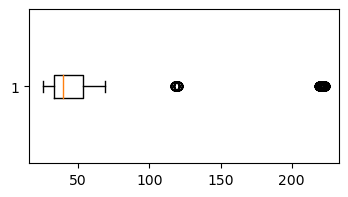

In [77]:
plt.figure(figsize=[4,2])
plt.boxplot(df_predict.age,vert=False)
plt.show()

In [78]:
 df_predict[['account_type','gender','Income']] = df_predict[['account_type','gender','Income']].apply(labelencoder.fit_transform)

In [79]:
df_predict.drop(columns=['loan_enq','personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed'],inplace=True)

In [80]:
df_predict

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
0,19427,0,1,63,2,30.1,10,628.0,1,5.0,...,61887.50,5,14,20770.0,44884.90,369000.75,40,96,46088.0,2646.72
1,16150,0,1,36,2,14.4,10,656.0,0,12.0,...,36644.25,4,63,78627.0,91073.84,243182.32,7,12,17953.0,5469.79
2,11749,0,0,28,2,4.8,10,314.0,1,13.0,...,50121.00,6,82,1260.0,96552.00,35467.00,16,42,41121.0,7207.85
3,11635,0,1,32,2,9.6,2,614.0,1,19.0,...,24917.00,2,78,23332.0,18250.00,87204.35,2,10,32003.0,591.34
4,8908,0,1,32,0,12.0,7,750.0,1,18.0,...,41381.00,3,171,41672.0,83525.75,83992.00,21,12,9626.0,2621.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1270,0,0,66,2,32.2,6,354.0,1,7.0,...,61078.00,0,8,24438.0,153772.21,31284.00,3,38,42872.0,6334.20
19996,15992,0,1,53,2,19.8,5,809.0,0,14.0,...,37545.00,47,11,213000.0,18098.47,93108.00,43,11,36747.0,102216.02
19997,7081,0,0,66,2,18.4,1,466.0,0,10.0,...,48230.00,2,171,34327.0,32198.63,46800.00,3,38,18810.0,1930.19
19998,6821,0,1,32,1,6.0,8,619.0,0,17.0,...,112616.76,3,82,51929.0,27334.14,20201.00,47,80,11443.0,24499.91


In [81]:
# df_pred=df_predict.select_dtypes(include=['int','float'])

In [82]:
df_predict=df_predict.apply(Outlier)

In [83]:
df_predict.columns

Index(['ID', 'account_type', 'gender', 'age', 'Income', 'Emp_Tenure_Years',
       'Tenure_with_Bank', 'region_code', 'NetBanking_Flag',
       'Avg_days_between_transaction', 'cc_cons_apr', 'dc_cons_apr',
       'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun',
       'cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr',
       'dc_count_may', 'dc_count_jun', 'card_lim', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
       'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may',
       'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun',
       'debit_count_jun', 'max_credit_amount_jun', 'emi_active'],
      dtype='object')

In [84]:
colu=['ID', 'account_type', 'gender', 'age', 'Income', 'Emp_Tenure_Years',
       'Tenure_with_Bank', 'region_code', 'NetBanking_Flag',
       'Avg_days_between_transaction', 'cc_cons_apr', 'dc_cons_apr',
       'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun',
       'cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr',
       'dc_count_may', 'dc_count_jun', 'card_lim', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
       'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may',
       'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun',
       'debit_count_jun', 'max_credit_amount_jun', 'emi_active']

In [85]:
## standard scalling:
df_predict[colu]=standardscaler.fit_transform(df_predict[colu])

In [86]:
df_predict

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
0,1.610358,-0.437125,0.389258,1.528126,0.700372,1.505850,1.576719,0.123445,0.634451,-1.107264,...,-0.137451,-0.418173,-0.663229,-0.602450,-0.358469,3.016507,0.829479,1.532837,0.075364,-0.503795
1,1.083869,-0.437125,0.389258,-0.575587,0.700372,0.090536,1.576719,0.251729,-1.576166,0.178279,...,-0.516742,-0.484231,0.543129,0.666036,0.407951,2.766933,-0.492317,-0.930712,-0.650997,-0.222693
2,0.322334,-0.437125,-2.568987,-1.198909,0.700372,-0.774880,1.576719,-1.315168,0.634451,0.361928,...,-0.314248,-0.352116,1.010900,-1.030197,0.498851,-0.510079,-0.131827,-0.050873,-0.052869,-0.049629
3,0.302607,-0.437125,0.389258,-0.887248,0.700372,-0.342172,-1.197140,0.059303,0.634451,1.463822,...,-0.692949,-0.616345,0.912422,-0.546280,-0.800426,0.306153,-0.692590,-0.989368,-0.288268,-0.708456
4,-0.169264,-0.437125,0.389258,-0.887248,-2.413571,-0.125818,0.536522,0.682397,0.634451,1.280173,...,-0.445570,-0.550288,3.202039,-0.144184,0.282705,0.255474,0.068445,-0.930712,-0.865975,-0.506318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-1.490921,-0.437125,-2.568987,1.761872,0.700372,1.695160,0.189790,-1.131905,0.634451,-0.739966,...,-0.149614,-0.748460,-0.810946,-0.522031,1.448315,-0.576072,-0.652535,-0.168185,-0.007663,-0.136621
19996,1.056529,-0.437125,0.389258,0.748973,0.700372,0.577332,-0.156943,0.952710,-1.576166,0.545577,...,-0.503208,2.356234,-0.737087,3.271560,-0.802940,0.399292,0.949642,-0.960040,-0.165792,3.391034
19997,-0.485403,-0.437125,-2.568987,1.761872,0.700372,0.451125,-1.543872,-0.618769,-1.576166,-0.189019,...,-0.342661,-0.616345,3.202039,-0.305220,-0.568974,-0.331284,-0.652535,-0.168185,-0.628871,-0.575143
19998,-0.530393,-0.437125,0.389258,-0.887248,-0.856599,-0.666703,0.883254,0.082211,-1.576166,1.096524,...,0.624778,-0.550288,1.010900,0.080696,-0.649691,-0.750922,1.109860,1.063590,-0.819065,1.672197


In [87]:
predict_val=pd.DataFrame(lr.predict(df_predict))

In [88]:
predict_val

,0
0,49026.375380
1,60085.920043
2,54183.417743
3,56388.353615
4,48363.222587
...,...
4988,58462.335298
4989,59103.343397
4990,44520.332183
4991,54359.619281


# DT

In [91]:
def decision_tree(x_tr,y_tr,x_ts,y_ts):
    from sklearn.tree import DecisionTreeRegressor
    from sklearn import metrics
    def rmspe(y_true, y_pred):
        y_true = np.array(y_true)# Convert to numpy arrays to avoid any data type issues
        y_pred = np.array(y_pred)# Calculate the percentage error
        pct_error = (y_true - y_pred) / y_true
        # Replace NaNs and Infs with zeros to avoid issues with the RMSPE calculation
        pct_error[np.isnan(pct_error)] = 0
        pct_error[np.isinf(pct_error)] = 0
        rmspe = np.sqrt(np.mean(pct_error**2))# Calculate the RMSPE
        return rmspe
    model_name,Parameters,Train_RMSPE,Test_RMSPE=[],[],[],[]
    dt_param={
             'splitter':['best','random'],
             'min_samples_split':[30,40,50,60],
             'max_depth':[5,6,7,8,9,10]}
    dt_gsv=GridSearchCV(DecisionTreeRegressor(),param_grid=dt_param,cv=5,n_jobs=-1)
    dt_gsv.fit(x_tr,y_tr)
    dt_model=DecisionTreeRegressor(**dt_gsv.best_params_)
    dt_model.fit(x_tr,y_tr)
    model_name.append(dt_model.__class__.__name__)
    Parameters.append(dt_gsv.best_params_)
    Train_RMSPE.append(rmspe(y_tr,dt_model.predict(x_tr)))
    Test_RMSPE.append(rmspe(y_ts,dt_model.predict(x_ts)))

    result=pd.DataFrame({'Model':model_name,'Best_parameters':Parameters,'Train_RMSPE':Train_RMSPE,'Test_RMSPE':Test_RMSPE})
    return result

In [92]:
%%time
#RMSPE scores for all features
dt_result=decision_tree(x_train,y_train,x_test,y_test)
dt_result

CPU times: total: 4.44 s
Wall time: 18.8 s


,Model,Best_parameters,Train_RMSPE,Test_RMSPE
0,DecisionTreeRegressor,"{'max_depth': 5, 'min_samples_split': 60, 'spl...",21.090142,21.310545


In [93]:
dtc=DecisionTreeRegressor(**dt_result.Best_parameters[0])
dtc.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=60, splitter='random')

<Axes: >

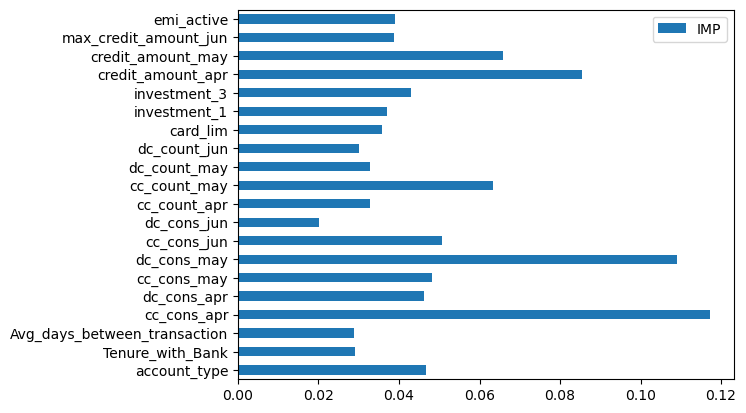

In [94]:
importance=pd.DataFrame(dtc.feature_importances_,dtc.feature_names_in_,columns=['IMP'])
importance[importance.IMP>0].plot(kind='barh')

In [95]:
important_features=dtc.feature_names_in_[dtc.feature_importances_>0]
important_features

array(['account_type', 'Tenure_with_Bank', 'Avg_days_between_transaction',
       'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'dc_count_may', 'dc_count_jun', 'card_lim', 'investment_1',
       'investment_3', 'credit_amount_apr', 'credit_amount_may',
       'max_credit_amount_jun', 'emi_active'], dtype=object)

In [96]:
%%time
##RMSPE scores by the taking importance features which are selected by the Decision Tree algorithm
dt_imp_features_result=decision_tree(x_train[important_features],y_train
                                     ,x_test[important_features],y_test)
dt_imp_features_result


CPU times: total: 3.03 s
Wall time: 9.43 s


,Model,Best_parameters,Train_RMSPE,Test_RMSPE
0,DecisionTreeRegressor,"{'max_depth': 5, 'min_samples_split': 40, 'spl...",21.130832,21.344227


In [97]:
dtc.predict(x_test)

array([61550.64394114, 62790.40828976, 46948.80963196, ...,
       46948.80963196, 46948.80963196, 53708.51036198])

In [98]:
df_1.columns

Index(['ID', 'account_type', 'gender', 'age', 'Income', 'Emp_Tenure_Years',
       'Tenure_with_Bank', 'region_code', 'NetBanking_Flag',
       'Avg_days_between_transaction', 'cc_cons_apr', 'dc_cons_apr',
       'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun',
       'cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr',
       'dc_count_may', 'dc_count_jun', 'card_lim', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
       'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may',
       'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun',
       'debit_count_jun', 'max_credit_amount_jun', 'emi_active', 'cc_cons'],
      dtype='object')

In [99]:
col=['ID', 'account_type', 'gender', 'age', 'Income', 'Emp_Tenure_Years',
       'Tenure_with_Bank', 'region_code', 'NetBanking_Flag',
       'Avg_days_between_transaction', 'cc_cons_apr', 'dc_cons_apr',
       'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun',
       'cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr',
       'dc_count_may', 'dc_count_jun', 'card_lim', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
       'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may',
       'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun',
       'debit_count_jun', 'max_credit_amount_jun', 'emi_active']

In [100]:
df_1[col]=standardscaler.fit_transform(df_1[col])

In [101]:
df_1

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
111,0.442460,-0.42269,0.398397,-0.667678,0.688920,0.154778,-1.574026,0.500720,-1.601607,1.083640,...,-0.614243,-0.025333,-0.515273,-0.603076,-0.858510,-0.686033,0.611105,0.171419,-0.589544,20014.00
112,1.331400,-0.42269,0.398397,-0.667678,-2.449098,0.154778,0.170716,-1.633908,-1.601607,0.537394,...,-0.614243,0.912544,-0.529897,-0.398388,0.141203,0.064159,0.552463,-0.511285,0.478249,10173.00
113,-0.421859,-0.42269,0.398397,0.881146,0.688920,1.025666,-1.574026,0.932237,0.624373,-1.465508,...,-0.614243,1.011267,-0.843685,-0.122692,0.126660,-0.488614,-1.265439,-0.417077,1.636455,16095.00
114,-1.471964,-0.42269,-2.510058,-1.132325,0.688920,-0.807783,0.170716,1.230626,0.624373,-1.283426,...,0.754545,-0.074695,-0.799575,0.071997,0.023056,0.064159,1.138882,-0.021425,-0.413892,7707.00
116,1.586505,-0.42269,0.398397,-1.287207,0.688920,-0.771114,-0.876129,1.634598,0.624373,-0.008852,...,2.058152,-0.963209,-0.589535,-0.225828,2.090672,-0.686033,-0.268525,-0.658211,-0.274688,130263.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15106,-0.528197,-0.42269,-2.510058,0.726263,-0.880089,-0.010233,1.217561,0.248237,0.624373,1.629885,...,-0.679423,-0.815123,-0.934426,3.001739,-0.387930,-0.212228,-1.060192,0.963045,3.493955,4263.00
15107,0.062160,-0.42269,0.398397,0.029293,0.688920,-1.000295,1.217561,-0.293453,0.624373,-1.647590,...,-0.483882,-0.518952,3.192679,-0.965804,-0.508282,-0.330679,-0.766982,1.834895,-0.299520,11019.00
15108,-1.368770,-0.42269,0.398397,-0.512795,0.688920,-0.908623,1.217561,-0.619386,0.624373,-0.555098,...,2.058152,-0.889166,-0.043068,0.547683,3.059839,-0.607066,0.845672,0.139497,-0.476536,322003.64
15109,1.466199,-0.42269,0.398397,1.965322,0.688920,2.446589,1.566510,-0.288863,0.624373,-1.465508,...,-0.549063,-0.395547,-0.566493,-0.727869,-0.539202,-0.646549,1.050919,-0.686746,0.474821,28813.00


In [102]:
dt=pd.DataFrame(dtc.predict(df_predict))

In [103]:
dt, predict_val

(                 0
 0     53708.510362
 1     53708.510362
 2     46286.741293
 3     72245.425474
 4     63128.070681
 ...            ...
 4988  46948.809632
 4989  52412.800756
 4990  46948.809632
 4991  52412.800756
 4992  46948.809632
 
 [4993 rows x 1 columns],
                  0
 0     49026.375380
 1     60085.920043
 2     54183.417743
 3     56388.353615
 4     48363.222587
 ...            ...
 4988  58462.335298
 4989  59103.343397
 4990  44520.332183
 4991  54359.619281
 4992  45486.023193
 
 [4993 rows x 1 columns])